In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from scipy import interpolate

In [2]:
import re
from textblob import TextBlob

In [3]:
df = pd.read_csv('polls.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.rename(columns={'Fetterman':'FettermanPoll', 'Oz':'OzPoll'}, inplace=True)
df['FettermanSocre'] = np.zeros(df.shape[0])
df['OzSocre'] = np.zeros(df.shape[0])

In [4]:
def polarity_score(data):
    
    data['weight_bucket'] = pd.qcut(data['author_followers'],q=[0,.2, .4, .6, .8, 1],labels=False,precision=0)
    
    #data['weight'] = data['author_followers'] / data['author_followers'].sum()
    data['weight'] = data['weight_bucket'] / data['weight_bucket'].sum()
    pol = 0
    for i in range(data.shape[0]):
        remove_rt = re.sub('RT @\w+: ',' ', data.iloc[i]['text'])
        rt = re.sub('(@[A-Za-z0–9]+)|(\w+:\/\/\S+)', ' ', remove_rt)
        text = rt.lower()
        analysis = TextBlob(text)
        pol += data.iloc[i]['weight'] * analysis.sentiment.polarity
        #pol += analysis.sentiment.polarity
    return pol

In [5]:
def polarity_score_vader(data):
    
    data['weight_bucket'] = pd.qcut(data['author_followers'],q=[0,.2, .4, .6, .8, 1],labels=False,precision=0)
    
    #data['weight'] = data['author_followers'] / data['author_followers'].sum()
    data['weight'] = data['weight_bucket'] / data['weight_bucket'].sum()
    pol = 0
    for i in range(data.shape[0]):
        remove_rt = re.sub('RT @\w+: ',' ', data.iloc[i]['text'])
        rt = re.sub('(@[A-Za-z0–9]+)|(\w+:\/\/\S+)', ' ', remove_rt)
        text = rt.lower()
        #analysis = TextBlob(text)
        sentiment = SentimentIntensityAnalyzer()
        pol += data.iloc[i]['weight'] * sentiment.polarity_scores(text)['compound']
        #pol += analysis.sentiment.polarity
    return pol

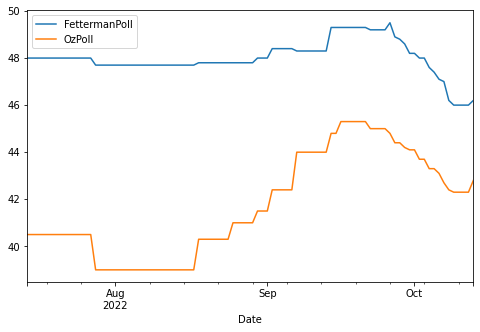

In [6]:
df[['FettermanPoll', 'OzPoll']].plot(figsize=(8,5))
plt.show()

In [7]:
def get_sentiment(pdf=df):
    for i in range(df.shape[0]):
        fetterman = pd.read_csv(f"tweets/fetterman/{df.index[i].strftime('%Y-%m-%d')}.csv")
        oz = pd.read_csv(f"tweets/oz/{df.index[i].strftime('%Y-%m-%d')}.csv")
        #df.iloc[i,2] = polarity_score_vader(fetterman)
        #df.iloc[i,3] = polarity_score_vader(oz)
        df.iloc[i,2] = polarity_score(fetterman)
        df.iloc[i,3] = polarity_score(oz)

In [8]:
def get_sentiment_vader(pdf=df):
    for i in range(df.shape[0]):
        fetterman = pd.read_csv(f"tweets/fetterman/{df.index[i].strftime('%Y-%m-%d')}.csv")
        oz = pd.read_csv(f"tweets/oz/{df.index[i].strftime('%Y-%m-%d')}.csv")
        df.iloc[i,2] = polarity_score_vader(fetterman)
        df.iloc[i,3] = polarity_score_vader(oz)
        #df.iloc[i,2] = polarity_score(fetterman)
        #df.iloc[i,3] = polarity_score(oz)

In [9]:
get_sentiment()

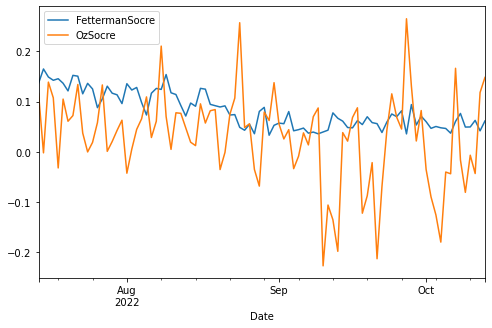

In [10]:
df[['FettermanSocre', 'OzSocre']].plot(figsize=(8,5))
plt.show()

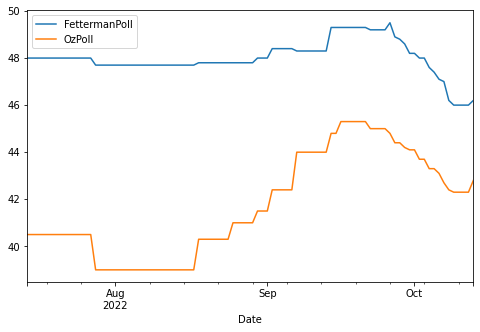

In [11]:
df[['FettermanPoll', 'OzPoll']].plot(figsize=(8,5))
plt.show()

In [12]:
np.corrcoef(df['FettermanSocre'].iloc[-5:], df['FettermanPoll'].iloc[-5:])[0,1]

0.536874634037379

In [13]:
np.corrcoef(df['OzSocre'].iloc[-5:], df['OzPoll'].iloc[-5:])[0,1]

0.6711783768290582